**Step 1: Upload the train.csv file**


In [3]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


**Step 2: Import Required Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better plots
sns.set(style="whitegrid")


**Step 3: Load and View Data**

In [5]:
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


** Step 4: Clean the Data**

**4.1 Check for missing values**

In [6]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**4.2 Handle missing values**

In [8]:
# Fill Age with median (recommended method)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with mode (recommended method)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



**Step 5: Summary Statistics**

In [9]:
df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


**Step 6: Group-Based Insights**

**6.1 Survival by Gender **

In [10]:
df.groupby('Sex')['Survived'].mean()


,Survived
Sex,
female,0.742038
male,0.188908


**6.2 Survival by Passenger Class**

In [11]:
df.groupby('Pclass')['Survived'].mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


**6.3 Cross-tab Gender & Class**

In [12]:
pd.crosstab(df['Sex'], df['Pclass'], values=df['Survived'], aggfunc='mean')


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


**Step 7: Visualizations**

**7.1 Bar Plot – Survival Rate by Gender**

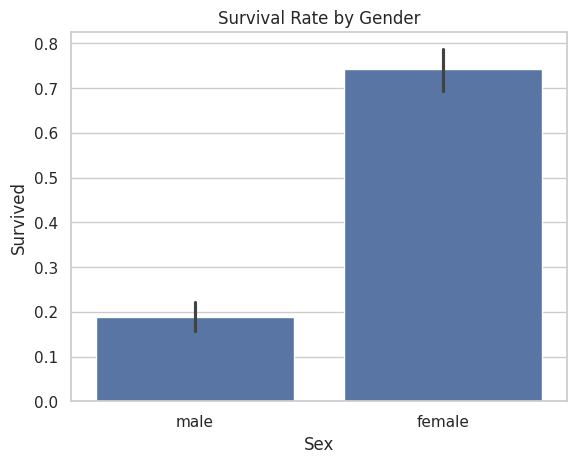

In [13]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()


**7.2 Bar Plot – Survival Rate by Class**

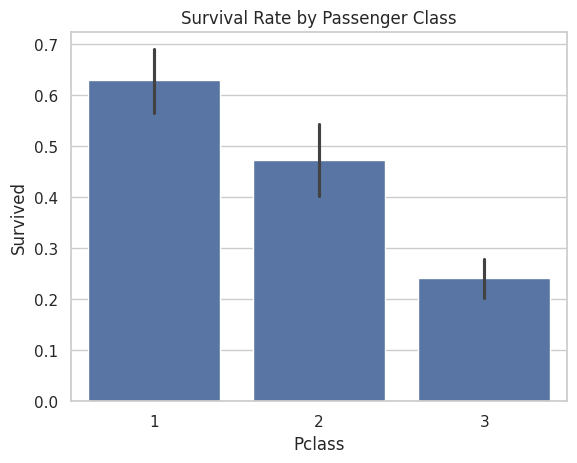

In [14]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


**7.3 Heatmap – Correlation Matrix**

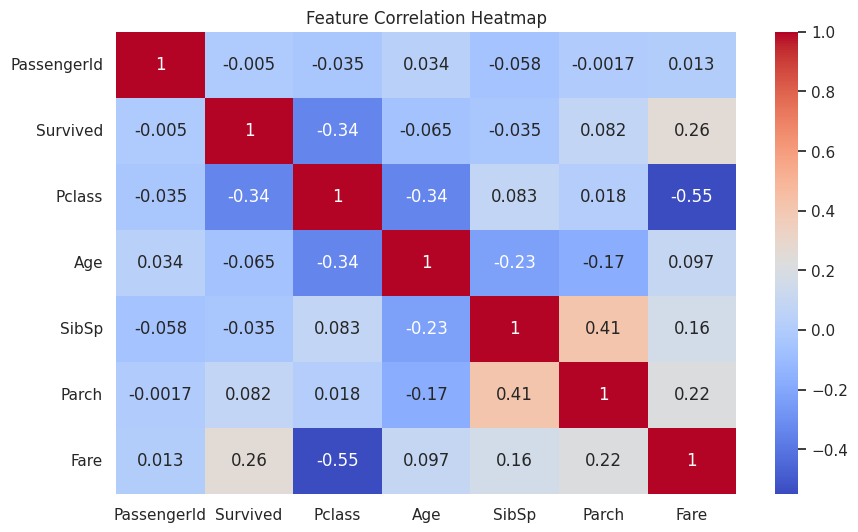

In [16]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()